## Importing libraries



We imported the Pandas, Numpy, Seaborn, and Matplotlib libraries so we could use them to manipulate the dataset and create visualizations for it.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.lines import Line2D

## Importing tn.movie_budgets.csv.gz and imdb.title.basics.csv.gz CSV Files and Merging them

In [2]:
df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
df_2 = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
df_meg = pd.merge(df, df_2, how='inner', left_on='movie', right_on='primary_title')
df_meg.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


## Checking to see how much of the Column is missing based off Percentage

In [3]:
for col in df_meg.columns:
    pct_missing = np.mean(df_meg[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
release_date - 0.0%
movie - 0.0%
production_budget - 0.0%
domestic_gross - 0.0%
worldwide_gross - 0.0%
tconst - 0.0%
primary_title - 0.0%
original_title - 0.0%
start_year - 0.0%
runtime_minutes - 13.0%
genres - 2.0%


## Dropping as well as Splitting and Replacing Columns

In [4]:
cols_to_drop = ['runtime_minutes','start_year','original_title','id' ,'production_budget', 'release_date','tconst','primary_title']
df_mod_2 = df_meg.drop(cols_to_drop, axis=1)
df_mod_2["genres"] = df_mod_2["genres"].apply(lambda x: x.split(",") if type(x) == str else x)
df_mod_2["domestic_gross"] = df["domestic_gross"].str.replace(",","").str.replace("$","").astype(int)
df_mod_2["worldwide_gross"] = df["worldwide_gross"].str.replace(",","").str.replace("$","").astype(int)
df_mod_2.head()

,movie,domestic_gross,worldwide_gross,genres
0,Avatar,760507625,2776345279,[Horror]
1,Pirates of the Caribbean: On Stranger Tides,241063875,1045663875,"[Action, Adventure, Fantasy]"
2,Dark Phoenix,42762350,149762350,"[Action, Adventure, Sci-Fi]"
3,Avengers: Age of Ultron,459005868,1403013963,"[Action, Adventure, Sci-Fi]"
4,Avengers: Infinity War,620181382,1316721747,"[Action, Adventure, Sci-Fi]"


## Exploding the Genres Column as well as changing the Zeros to Nan then Dropping Nan's

In [5]:
df_explode = df_mod_2.explode('genres')
df_explode.replace(0, np.nan, inplace=True)
df_explode[df_explode.isna().any(axis=1)]
df_explode = df_explode.dropna()
print(df.isnull().sum())

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


## Grouping by Genres means and sourting it by worldwide_gross as well as setting index to Movies

In [6]:
df_explode.groupby('genres').mean()
df_explode= df_explode.sort_values("worldwide_gross", ascending=False).set_index('movie')
df_top_50 = df_explode

## Plotting the data in a Bar Plot

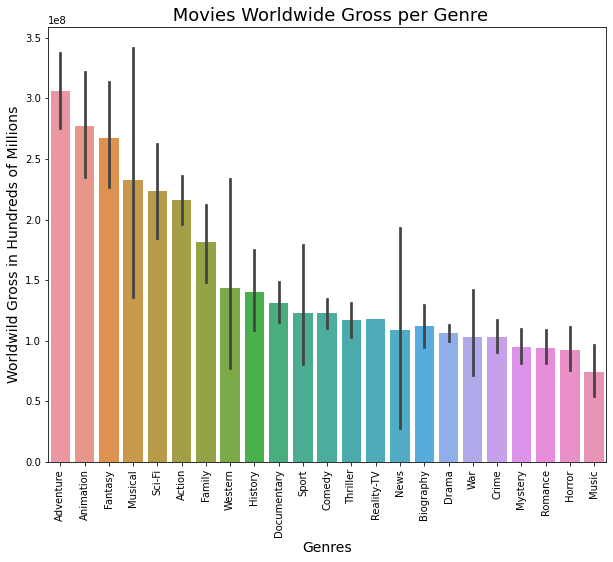

In [7]:
plt.figure(figsize=(10, 8))
sns.barplot(x='genres', 
            y='worldwide_gross',
            order=["Adventure","Animation","Fantasy","Musical",'Sci-Fi','Action', 'Family',"Western","History",'Documentary', 'Sport',"Comedy",'Thriller',"Reality-TV",'News','Biography','Drama', 'War','Crime','Mystery', 'Romance','Horror',"Music"],
            data=df_top_50,)
plt.ylabel("Worldwild Gross in Hundreds of Millions", size=14)
plt.xlabel("Genres", size=14)
plt.title(" Movies Worldwide Gross per Genre", size=18)
plt.tick_params(axis='x', labelrotation=90)
plt.savefig("images/grouped_barplot_Seaborn_barplot_Python.png")

## Work on tmdb_movies_data.csv.zip CSV

## Importing CSV and Dropping Columns

In [8]:
df3 = pd.read_csv('data/zippedData/tmdb_movies_data.csv.zip')
cols_to_drop = ['id', 'imdb_id','cast', 'homepage', 'director','tagline', 'overview', 'production_companies','keywords' ,'vote_count','genres','release_date','release_year','vote_average','budget_adj','popularity','revenue_adj']
df_mod = df3.drop(cols_to_drop, axis=1)
df_mod.head()

,budget,revenue,original_title,runtime
0,150000000,1513528810,Jurassic World,124
1,150000000,378436354,Mad Max: Fury Road,120
2,110000000,295238201,Insurgent,119
3,200000000,2068178225,Star Wars: The Force Awakens,136
4,190000000,1506249360,Furious 7,137


## Replacing zeros with nan and dropping the nan's

In [9]:
df_mod.replace(0, np.nan, inplace=True)
df_mod[df_mod.isna().any(axis=1)]
df_mod = df_mod.dropna()
print(df_mod.isnull().sum())

budget            0
revenue           0
original_title    0
runtime           0
dtype: int64


## Sorting Values in ascending order for Revenue

In [10]:
df_mod= df_mod.sort_values("revenue", ascending=False)
df_mod.describe()

,budget,revenue,runtime
count,3.855000e+03,3.855000e+03,3855.000000
mean,3.720183e+07,1.076589e+08,109.215824
std,4.220291e+07,1.765248e+08,19.922166
min,1.000000e+00,2.000000e+00,15.000000
25%,1.000000e+07,1.357645e+07,95.000000
50%,2.400000e+07,4.479322e+07,106.000000
75%,5.000000e+07,1.241530e+08,119.000000
max,4.250000e+08,2.781506e+09,338.000000


## Setting parameters based of a film has to be 40 min to be considered a movie and removing the outliers that skew the Data

In [11]:
df_mod2 = df_mod.loc[(df_mod['runtime'] >= 40) & (df_mod['runtime'] <= 190) & (df_mod['revenue'] > 226830568) & (df_mod['revenue'] < 2068178225)]
df_mod2.head()

,budget,revenue,original_title,runtime
4361,220000000.0,1.519558e+09,The Avengers,143.0
0,150000000.0,1.513529e+09,Jurassic World,124.0
4,190000000.0,1.506249e+09,Furious 7,137.0
14,280000000.0,1.405036e+09,Avengers: Age of Ultron,141.0
3374,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,130.0


## Creating  variables for insertion into Graph

In [12]:
runtime_25_percentile = df_mod2['runtime'].quantile(.25)
runtime_75_percentile = df_mod2['runtime'].quantile(.75)

## Plotting Data in a Scatter Plot

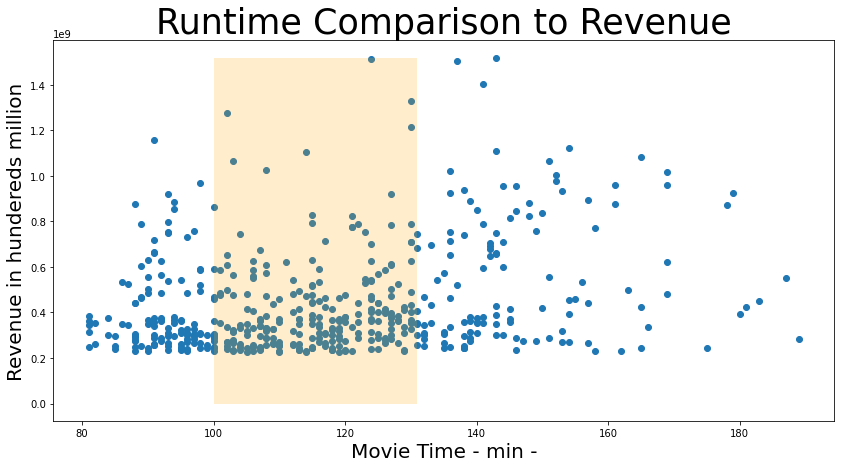

In [13]:
fig, ax = plt.subplots(figsize=(14,7))
data = df_mod2[['runtime', 'revenue']]
x = data['runtime']
y = data['revenue']
plt.scatter(x, y)
plt.title('Runtime Comparison to Revenue', fontsize=35)
plt.xlabel('Movie Time - min -', fontsize=20)
plt.ylabel('Revenue in hundereds million', fontsize= 20)
plt.fill_between([runtime_25_percentile, runtime_75_percentile], max(y), facecolor='orange', alpha=.2)
plt.savefig("images/Runtime_Comparison.png")
plt.show()

# Working on Rotten Tomatoes Movies CSV

## Calling the CSV

In [14]:
df_4 = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
df_4.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


## Dropping columns and Null values

In [15]:
cols_to_drop = ['critics_consensus', 'movie_info','directors', 'authors', 'actors', 'streaming_release_date','runtime', 'production_company', 'tomatometer_count', 
                'audience_status', 'tomatometer_rating', 'audience_count', 'tomatometer_top_critics_count','audience_rating','original_release_date', 'rotten_tomatoes_link' ,'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']
df_dropped_colums = df_4.drop(cols_to_drop, axis=1)
df_dropped_colums.replace(0, np.nan, inplace=True)
df_dropped_colums[df_dropped_colums.isna().any(axis=1)]
df_dropped_colums = df_dropped_colums.dropna()
print(df_dropped_colums.isnull().sum())

movie_title           0
content_rating        0
genres                0
tomatometer_status    0
dtype: int64


## Splitting the Genres Column on the ","  and Exploding and isolating the Adventure Genres

In [16]:
df_dropped_colums["genres"] = df_dropped_colums["genres"].apply(lambda x: x.split(",") if type(x) == str else x)

df_explode_2 = df_dropped_colums.explode('genres')

new_df = df_explode_2[df_explode_2['genres'].str.contains('Action & Adventure')]
new_df

,movie_title,content_rating,genres,tomatometer_status
0,Percy Jackson & the Olympians: The Lightning T...,PG,Action & Adventure,Rotten
4,"20,000 Leagues Under The Sea",G,Action & Adventure,Fresh
5,"10,000 B.C.",PG-13,Action & Adventure,Rotten
6,The 39 Steps,NR,Action & Adventure,Certified-Fresh
18,The Adventures of Mark Twain,G,Action & Adventure,Fresh
...,...,...,...,...
17702,Zoo,PG,Action & Adventure,Fresh
17706,Zoom,PG,Action & Adventure,Rotten
17708,Zootopia,PG,Action & Adventure,Certified-Fresh
17709,Zorba the Greek,NR,Action & Adventure,Fresh


## Setting Index replacing the Ratings with values and setting those values to 1 then Grouping by content_rating, tomatometer_status

In [17]:
new_df.set_index('genres')
new_df.replace({'G': 0, 'PG': 1, 'PG-13': 2, 'NC17': 3, 'NR': 4, 'R': 5})
new_df['movie_count'] = 1
df_cor = new_df.groupby(['content_rating', 'tomatometer_status']).count()
df_cor

<ipython-input-17-2da686128ab3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movie_count'] = 1


movie_title  genres  movie_count
content_rating tomatometer_status                                  
G              Certified-Fresh              24      24           24
               Fresh                        94      94           94
               Rotten                       68      68           68
NC17           Fresh                         1       1            1
NR             Certified-Fresh              41      41           41
               Fresh                       354     354          354
               Rotten                      191     191          191
PG             Certified-Fresh             112     112          112
               Fresh                       189     189          189
               Rotten                      304     304          304
PG-13          Certified-Fresh             160     160          160
               Fresh                       138     138          138
               Rotten                      504     504          504
R              Certified-Fresh             210     210          210
               Fresh                       341     341          341
               Rotten                      811     811          811

## Resetting Index and Dropping the Generes column to keep the Genre Column

In [18]:
df_cor = df_cor.reset_index()
cols_to_drop = ['genres']
df_drop = df_cor.drop(cols_to_drop, axis=1)
df_drop.head()

,content_rating,tomatometer_status,movie_title,movie_count
0,G,Certified-Fresh,24,24
1,G,Fresh,94,94
2,G,Rotten,68,68
3,NC17,Fresh,1,1
4,NR,Certified-Fresh,41,41


## Ploting the data in a Bar Graph

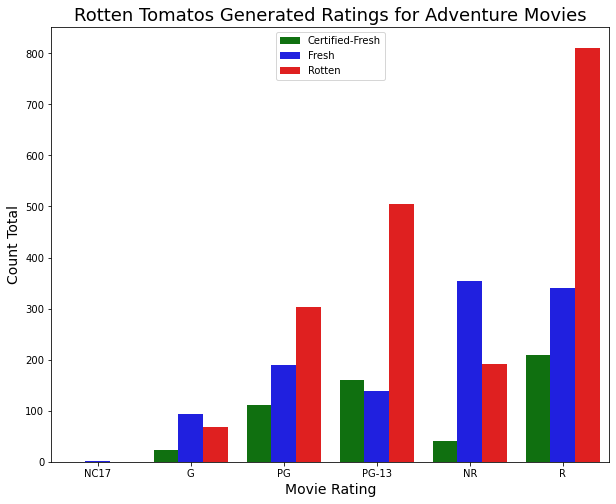

In [19]:
plt.figure(figsize=(10, 8))
sns.barplot(x='content_rating', 
            y='movie_count', 
            hue='tomatometer_status',
            order=["NC17","G","PG","PG-13",'NR', 'R'],
            data=df_cor, palette=['green', 'blue', 'red'])
plt.ylabel("Count Total", size=14)
plt.xlabel("Movie Rating", size=14)
plt.title("Rotten Tomatos Generated Ratings for Adventure Movies", size=18)
plt.savefig("images/Rotten_tomatose_Ratings.png")
plt.legend()